In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 6.3 MB/s 
     |████████████████████████████████| 112 kB 58.7 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 270 kB 50.9 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 212 kB 48.6 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 2.3 MB 45.0 MB/s 
     |████████████████████████████████| 57 kB 4.5 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 68 kB 5.7 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 594 kB 57.5 MB/s 
     |████████████████████████████████| 856 kB 54.

In [2]:
import gradio as gr

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Flatten,Dense
import numpy as np
import pandas as pd


In [4]:
print(tf.__version__)

2.8.2


In [5]:
%matplotlib inline

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(len(x_train))
print(len(x_test))

60000
10000


In [8]:
print(y_train[0])

5


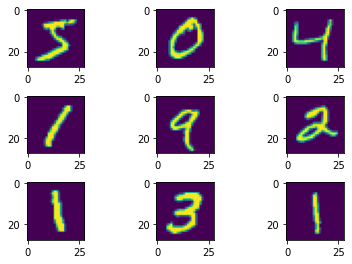

In [9]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)
  plt.imshow(x_train[i])

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train=x_train/255.0
x_test=x_test/255.0

In [12]:
model=tf.keras.Sequential([Flatten(input_shape=(28,28)),
                           Dense(256,activation='relu'),
                           Dense(256,activation='relu'),
                           Dense(128,activation='relu'),
                           Dense(10,activation=tf.nn.softmax)])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2048 - accuracy: 0.9380
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0930 - accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0665 - accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0490 - accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0421 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0343 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0285 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0

5


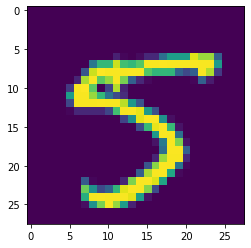

In [15]:
plt.imshow(x_test[102])
test=x_test[102].reshape(1,28,28)
pred=model.predict(test)
print(np.argmax(pred))

In [16]:
y_predicted=model.predict(x_test)
y_predicted[0]



array([6.3209652e-15, 1.1572751e-08, 4.9025739e-10, 6.0897283e-09,
       1.8515687e-08, 2.5889341e-11, 7.6450646e-17, 9.9999988e-01,
       1.3404392e-11, 6.0594218e-08], dtype=float32)

In [17]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

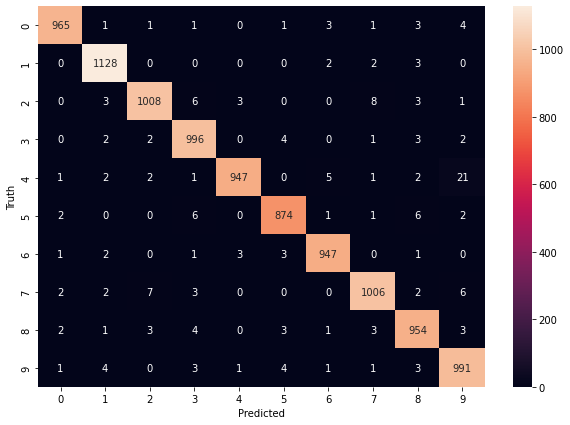

In [18]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9816


[0.07287996262311935, 0.9815999865531921]

In [20]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  
  prediction=model.predict(img_3d)
  pred=np.argmax(prediction)
  return pred

In [21]:
interface=gr.Interface(predict_image,inputs='sketchpad',outputs="label")

3


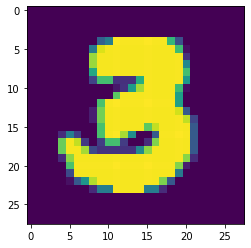

In [22]:
plt.imshow(x_test[200])
print(predict_image(x_test[200]))

In [ ]:
interface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://21803.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
